# Final Project - Data Analysis and Classification
#### Riccardo Biella

Import of libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import networkx as nx
import community

# Imports libraries
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.cluster import DBSCAN

Load the datasets

In [2]:
db_artists = pd.read_csv("datasets/artists.csv",error_bad_lines=False, sep = '\t')
db_user_artists = pd.read_csv("datasets/user_artists.csv",error_bad_lines=False, sep = '\t')
db_user_friends = pd.read_csv("datasets/user_friends.csv",error_bad_lines=False, sep = '\t')
db_tags = pd.read_csv("datasets/tags.csv",error_bad_lines=False, sep = '\t')
db_test_user_artists = pd.read_csv("datasets/test_user_artists.csv",error_bad_lines=False, sep = '\t')
db_user_taggedartists = pd.read_csv("datasets/user_taggedartists.csv",error_bad_lines=False, sep = '\t')
db_user_taggedartists_timestamps = pd.read_csv("datasets/user_taggedartists_timestamps.csv",error_bad_lines=False, sep = '\t')

## Task1: EDA
Explore the dataset (shape of each file, data types, values distribution, ...).

##### EDA on artists dataset

In [3]:
db_artists.head(10)

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte
5,6,Moonspell
6,7,Marilyn Manson
7,8,DIR EN GREY
8,9,Combichrist
9,10,Grendel


In [4]:
db_artists.shape

(17632, 2)

In [5]:
db_artists.dtypes

id       int64
name    object
dtype: object

In [6]:
db_artists.describe(include='all') #includes also the cathegorical values

,id,name
count,17632.000000,17632
unique,NaN,17632
top,NaN,B.B. King
freq,NaN,1
mean,9156.636853,NaN
std,5392.515296,NaN
min,1.000000,NaN
25%,4501.750000,NaN
50%,9048.500000,NaN
75%,13769.250000,NaN


##### EDA on user_artists dataset

In [7]:
db_user_artists.head(10)

,userID,artistID,weight
0,1430,1097,108
1,822,267,2157
2,1335,13910,59
3,815,325,2977
4,1147,12657,142
5,2093,2893,153
6,656,5156,22
7,80,2215,3
8,1273,441,129
9,1340,2637,502


In [8]:
db_user_artists.shape

(83491, 3)

In [9]:
db_user_artists.dtypes

userID      int64
artistID    int64
weight      int64
dtype: object

In [10]:
db_user_artists.describe(include='all') #includes also the cathegorical values

,userID,artistID,weight
count,83491.000000,83491.00000,83491.000000
mean,1036.348133,3329.55055,743.107173
std,610.703821,4381.56117,3773.524885
min,2.000000,1.00000,1.000000
25%,501.500000,436.00000,107.000000
50%,1027.000000,1246.00000,260.000000
75%,1568.000000,4351.50000,614.000000
max,2100.000000,18745.00000,352698.000000


##### EDA on user_friends dataset

In [11]:
db_user_friends.head(10)

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831
5,2,909
6,2,1209
7,2,1210
8,2,1230
9,2,1327


In [12]:
db_user_friends.shape

(25434, 2)

In [13]:
db_user_friends.dtypes

userID      int64
friendID    int64
dtype: object

In [14]:
db_user_friends.describe(include='all') #includes also the cathegorical values

,userID,friendID
count,25434.000000,25434.000000
mean,992.161437,992.161437
std,603.959049,603.959049
min,2.000000,2.000000
25%,441.000000,441.000000
50%,984.000000,984.000000
75%,1514.000000,1514.000000
max,2100.000000,2100.000000


##### EDA on tags dataset

In [15]:
db_tags.head(10)

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal
5,6,industrial metal
6,7,gothic metal
7,8,terror ebm
8,9,electro-industrial
9,10,harsh ebm


In [16]:
db_tags.shape

(11946, 2)

In [17]:
db_tags.dtypes

tagID        int64
tagValue    object
dtype: object

In [18]:
db_tags.describe(include='all') #includes also the cathegorical values

,tagID,tagValue
count,11946.000000,11946
unique,NaN,11946
top,NaN,jrock
freq,NaN,1
mean,6242.315336,NaN
std,3667.498057,NaN
min,1.000000,NaN
25%,3036.250000,NaN
50%,6210.500000,NaN
75%,9460.750000,NaN


##### EDA on test_user_artists dataset

In [19]:
db_test_user_artists.head(10)

,userID,artistID
0,186,704
1,1833,10600
2,1620,3817
3,1535,7777
4,1493,7120
5,1115,14852
6,1217,5437
7,1153,18707
8,584,5052
9,2014,601


In [20]:
db_test_user_artists.shape

(19245, 2)

In [21]:
db_test_user_artists.dtypes

userID      int64
artistID    int64
dtype: object

In [22]:
db_test_user_artists.describe(include='all') #includes also the cathegorical values

,userID,artistID
count,19245.000000,19245.000000
mean,1038.011587,5957.216368
std,610.314875,5569.652843
min,2.000000,1.000000
25%,506.000000,989.000000
50%,1037.000000,4052.000000
75%,1566.000000,10156.000000
max,2100.000000,18744.000000


##### EDA on user_taggedartists dataset

In [23]:
db_user_taggedartists.head(10)

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009
5,2,63,13,1,4,2009
6,2,63,14,1,4,2009
7,2,63,23,1,4,2009
8,2,63,40,1,4,2009
9,2,73,13,1,4,2009


In [24]:
db_user_taggedartists.shape

(186479, 6)

In [25]:
db_user_taggedartists.dtypes

userID      int64
artistID    int64
tagID       int64
day         int64
month       int64
year        int64
dtype: object

In [26]:
db_user_taggedartists.describe(include='all') #includes also the cathegorical values

,userID,artistID,tagID,day,month,year
count,186479.000000,186479.000000,186479.000000,186479.000000,186479.000000,186479.000000
mean,1035.600137,4375.845328,1439.582913,1.095566,6.524215,2008.809791
std,622.461272,4897.789595,2775.340279,0.712813,3.486855,1.410062
min,2.000000,1.000000,1.000000,1.000000,1.000000,1956.000000
25%,488.000000,686.000000,79.000000,1.000000,3.000000,2008.000000
50%,1021.000000,2203.000000,195.000000,1.000000,7.000000,2009.000000
75%,1624.000000,6714.000000,887.000000,1.000000,10.000000,2010.000000
max,2100.000000,18744.000000,12647.000000,9.000000,12.000000,2011.000000


##### EDA on user_taggedartists_timestamps dataset

In [27]:
db_user_taggedartists_timestamps.head(10)

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000
5,2,63,13,1238536800000
6,2,63,14,1238536800000
7,2,63,23,1238536800000
8,2,63,40,1238536800000
9,2,73,13,1238536800000


In [28]:
db_user_taggedartists_timestamps.shape

(186479, 4)

In [29]:
db_user_taggedartists_timestamps.dtypes

userID       int64
artistID     int64
tagID        int64
timestamp    int64
dtype: object

In [30]:
db_user_taggedartists_timestamps.describe(include='all') #includes also the cathegorical values

,userID,artistID,tagID,timestamp
count,186479.000000,186479.000000,186479.000000,1.864790e+05
mean,1035.600137,4375.845328,1439.582913,1.239204e+12
std,622.461272,4897.789595,2775.340279,4.299091e+10
min,2.000000,1.000000,1.000000,-4.287204e+11
25%,488.000000,686.000000,79.000000,1.209593e+12
50%,1021.000000,2203.000000,195.000000,1.243807e+12
75%,1624.000000,6714.000000,887.000000,1.275343e+12
max,2100.000000,18744.000000,12647.000000,1.304941e+12


#### 1. Calculate the number of users and artists present in the network. 

In [31]:
print("Number of artists: ", db_artists.shape[0])
print("Number of users: ", len(db_user_artists["userID"].unique()))

Number of artists:  17632
Number of users:  1892


#### 2. Calculate the number of bi-directional user-friend relations pairs. 

In [32]:
bidirectionalFriends = 0
for userRelation in db_user_friends.values:
    friendRelations = db_user_friends.loc[db_user_friends['userID'] == userRelation[1]]
    for friendRelation in friendRelations.values:
        if userRelation[0] == friendRelation[1] and userRelation[1] == friendRelation[0]:
            bidirectionalFriends = bidirectionalFriends + 1
print("Number of bi-directional user-friend relations pairs: ", bidirectionalFriends)

Number of bi-directional user-friend relations pairs:  25434


#### 3. Calculate the average friend relations per user. 

In [33]:
usersRelationsGrouped = db_user_friends.groupby("userID")["friendID"].count()
print("The average friend relations per user is: ", np.mean(usersRelationsGrouped))

The average friend relations per user is:  13.44291754756871


#### 4. Calculate the number of user-listened artists relations (couples user-artist). 

In [34]:
print("Number of user-listened artists relations:")
userListenedArtists = db_user_artists.groupby("userID")["artistID"].count()
userListenedArtists

Number of user-listened artists relations:


userID
2       44
3       48
4       46
5       46
6       46
        ..
2095    41
2096    42
2097    46
2099    43
2100    44
Name: artistID, Length: 1892, dtype: int64

#### 5. Plot the distribution of the number of artists listened by each user, and calculate the average and mode of the distribution.

Average : 44.1284355179704
Mode of the distribution : [45]


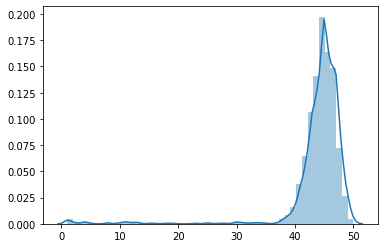

In [35]:
sns.distplot(userListenedArtists.values)
print("Average :", np.mean(userListenedArtists.values))
print("Mode of the distribution :",stats.mode(userListenedArtists.values)[0])

#### 6. Plot the distribution of the number of tag assignments per each artist, and calculate the average and mode of the distribution.

Average : 14.890920705901141
Mode of the distribution : [1]


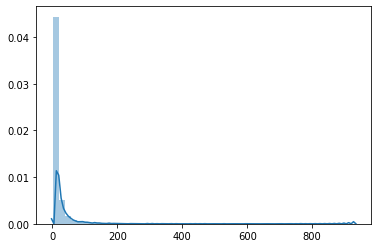

In [36]:
artistsTags = db_user_taggedartists_timestamps.groupby("artistID")["tagID"].count()

sns.distplot(artistsTags.values)
print("Average :", np.mean(artistsTags.values))
print("Mode of the distribution :",stats.mode(artistsTags.values)[0])

#### 7. Plot the distribution of the number of tag assignments per each user, and calculate the average and mode of the distribution.

Average : 98.56183932346723
Mode of the distribution : [3]


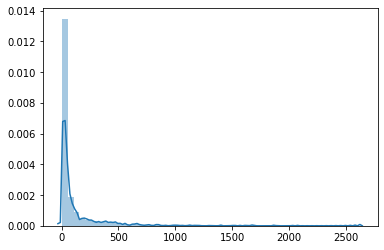

In [37]:
usersTags = db_user_taggedartists_timestamps.groupby("userID")["tagID"].count()

sns.distplot(usersTags.values)
print("Average :", np.mean(usersTags.values))
print("Mode of the distribution :",stats.mode(usersTags.values)[0])

#### 8. Plot the distribution of the number of distinct tag assignments per each artist, and calculate the average and mode of the distribution.

Average : 8.763874470973409
Mode of the distribution : [1]


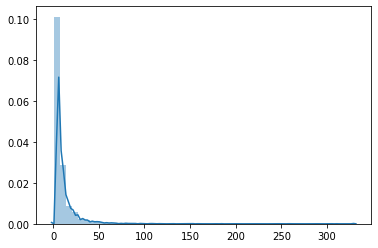

In [38]:
artistsUniqueTags = db_user_taggedartists_timestamps.groupby("artistID")["tagID"].unique().apply(lambda x: len(x))
sns.distplot(artistsUniqueTags.values)
print("Average :", np.mean(artistsUniqueTags.values))
print("Mode of the distribution :",stats.mode(artistsUniqueTags.values)[0])

## Task2: Clustering tags

Clustering music tags according to the artists association (content vectors). 


#### 1. Cluster tags according to the association to artists . Justify your choices and comments on the results. Consider at least two different clustering algorithms based on similarity between tags, and compare the clustering.

In [39]:
# Filtro i tag rimuovendo le  quelli usati meno di 5 volte
user_taggedartists_data_filtered = db_user_taggedartists.groupby('tagID').filter(lambda x : len(x) > 5)
print("Numero di categorie di tag:", len(set(user_taggedartists_data_filtered['tagID'])), "per un totale di", np.sum(len(user_taggedartists_data_filtered)), "tags e", len(set(user_taggedartists_data_filtered['artistID'])), "artisti.")
tags_number = len(set(user_taggedartists_data_filtered['tagID']))

Numero di categorie di tag: 2074 per un totale di 174486 tags e 12189 artisti.


In [40]:
# Costruisco una matrice che ha sulle righe i tag e sulle colonne gli artisti, come valore il numero di volte che un artista è stato taggato con quel tag (in percentuale)
adjacency_matrix_dataframe = pd.crosstab(user_taggedartists_data_filtered['tagID'], user_taggedartists_data_filtered['artistID'])
adjacency_matrix_dataframe

artistID,1,2,3,4,5,6,7,8,9,10,...,18724,18732,18734,18735,18736,18737,18739,18740,18741,18744
tagID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,0,0,25,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Normalizzo la matrice
matrix_power_2 = adjacency_matrix_dataframe ** 2
squared_sums = matrix_power_2.sum(axis=1).pow(1./2)
adjacency_matrix_dataframe_normalized = adjacency_matrix_dataframe.divide(squared_sums, axis='rows')
adjacency_matrix_dataframe_normalized

artistID,1,2,3,4,5,6,7,8,9,10,...,18724,18732,18734,18735,18736,18737,18739,18740,18741,18744
tagID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.015875,0.0,0.000000,0.198431,0.031749,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.078353,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.078811,0.000000,0.0,0.105081,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12642,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12643,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12644,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Caldolo la matrice di similatrità
similarity_matrix = adjacency_matrix_dataframe_normalized.dot(adjacency_matrix_dataframe_normalized.transpose())
similarity_matrix

tagID,1,2,3,4,5,6,7,8,9,10,...,12549,12638,12639,12640,12641,12642,12643,12644,12646,12647
tagID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.515560,0.003113,0.061512,0.206248,0.278903,0.197738,0.00000,0.005818,0.000000,...,0.002646,0.0,0.011405,0.0,0.0,0.012710,0.0,0.204143,0.000000,0.000000
2,0.515560,1.000000,0.000000,0.000000,0.025693,0.072204,0.019368,0.00000,0.015954,0.000000,...,0.000000,0.0,0.004691,0.0,0.0,0.025093,0.0,0.010662,0.000000,0.000000
3,0.003113,0.000000,1.000000,0.000000,0.000000,0.005067,0.013635,0.00000,0.047919,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.080064,0.000000,0.000000
4,0.061512,0.000000,0.000000,1.000000,0.106048,0.014254,0.054183,0.03323,0.000000,0.017762,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.010725,0.042899,0.000000
5,0.206248,0.025693,0.000000,0.106048,1.000000,0.045138,0.024763,0.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.090018,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12642,0.012710,0.025093,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.065372
12643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000
12644,0.204143,0.010662,0.080064,0.010725,0.090018,0.000000,0.208141,0.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000


In [43]:
distance_matrix = pd.DataFrame(squareform(pdist(adjacency_matrix_dataframe_normalized)), columns = adjacency_matrix_dataframe_normalized.index, index = adjacency_matrix_dataframe_normalized.index)
distance_matrix

tagID,1,2,3,4,5,6,7,8,9,10,...,12549,12638,12639,12640,12641,12642,12643,12644,12646,12647
tagID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.984317,1.412010,1.370028,1.259962,1.200914,1.266698,1.414214,1.410094,1.414214,...,1.412341,1.414214,1.406126,1.414214,1.414214,1.405198,1.414214,1.261631,1.414214,1.414214
2,0.984317,0.000000,1.414214,1.414214,1.395927,1.362201,1.400451,1.414214,1.402887,1.414214,...,1.414214,1.414214,1.410893,1.414214,1.414214,1.396357,1.414214,1.406654,1.414214,1.414214
3,1.412010,1.414214,0.000000,1.414214,1.414214,1.410626,1.404539,1.414214,1.379914,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.356419,1.414214,1.414214
4,1.370028,1.414214,1.414214,0.000000,1.337125,1.404098,1.375367,1.390518,1.414214,1.401598,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.406610,1.383547,1.414214
5,1.259962,1.395927,1.414214,1.337125,0.000000,1.381928,1.396593,1.414214,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.349061,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12642,1.405198,1.396357,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.367207
12643,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214
12644,1.261631,1.406654,1.356419,1.406610,1.349061,1.414214,1.258459,1.414214,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214


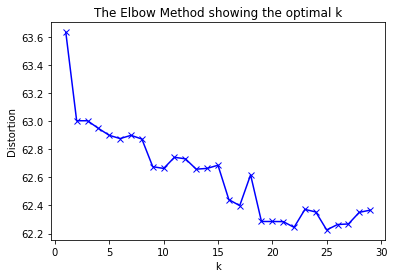

In [44]:
# Provo diversi valori di k e scelgo il migliore, potrebbe richiedere 1/2 miuti 
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(distance_matrix)
    distortions.append(sum(np.min(cdist(similarity_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / similarity_matrix.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [45]:
kmeanModel = KMeans(n_clusters=13).fit(similarity_matrix)
labels = kmeanModel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[  40 1140   69   80  133  178  157   59   44   87   22   30   35]


In [46]:
agglomerativeModel = AgglomerativeClustering(n_clusters=13, affinity='cosine', linkage='complete')
# Perchè anche lui fuziona solo con la similarity matrix?
result_clustering = agglomerativeModel.fit_predict(similarity_matrix)
labels = agglomerativeModel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[297 679  66  29  81  88  38 443 159  79  67  24  24]


In [47]:
dbscanModel = DBSCAN(eps=2, min_samples=10).fit(distance_matrix)
labels = dbscanModel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[40 29 16 41 15 13 20 22 19 23 17 20 20 16 18 15 13  8 11 16 19 21  9 15
 12 25 27  4 10 12  9  9 11]


#### 2. Associate to each cluster a meta-tag, and consider using it as tag for the music social network.

In [48]:
user_taggedartists_data_filtered

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
5,2,63,13,1,4,2009
...,...,...,...,...,...,...
186473,2100,13978,574,1,6,2009
186474,2100,16437,4,1,7,2010
186475,2100,16437,292,1,5,2010
186476,2100,16437,2087,1,7,2010


In [49]:
user_taggedartists_data_filtered['metaTag'] = ''
for index, tag_id in enumerate(similarity_matrix.index):
    user_taggedartists_data_filtered.loc[user_taggedartists_data_filtered['tagID']==tag_id, 'metaTag'] = result_clustering[index]

C:\Users\ricca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ricca\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [50]:
user_taggedartists_data_filtered

,userID,artistID,tagID,day,month,year,metaTag
0,2,52,13,1,4,2009,8
1,2,52,15,1,4,2009,8
2,2,52,18,1,4,2009,1
3,2,52,21,1,4,2009,8
5,2,63,13,1,4,2009,8
...,...,...,...,...,...,...,...
186473,2100,13978,574,1,6,2009,8
186474,2100,16437,4,1,7,2010,0
186475,2100,16437,292,1,5,2010,4
186476,2100,16437,2087,1,7,2010,0


In [51]:
mask = db_user_artists.groupby(['userID'])['weight'].transform(max) == db_user_artists['weight']
db_user_preferredArtist = db_user_artists[mask]
del db_user_preferredArtist["weight"]
db_user_preferredArtist

,userID,artistID
36,814,321
47,1432,14522
94,854,8277
160,56,1513
206,1287,1521
...,...,...
83339,277,190
83389,1879,707
83416,1022,544
83419,393,227


In [52]:
db_user_preferredArtist['metaTag'] = np.NaN
for artist_id in set(user_taggedartists_data_filtered['artistID']):
    artists = user_taggedartists_data_filtered[user_taggedartists_data_filtered['artistID']==artist_id]
    db_user_preferredArtist.loc[db_user_preferredArtist['artistID']==artist_id, 'metaTag'] = artists['metaTag'].value_counts()[:1].index.tolist()[0]

C:\Users\ricca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
db_user_preferredMusicType = db_user_preferredArtist.dropna()
del db_user_preferredMusicType['artistID']
db_user_preferredMusicType

,userID,metaTag
36,814,7.0
94,854,0.0
160,56,1.0
206,1287,0.0
237,140,1.0
...,...,...
83339,277,1.0
83389,1879,5.0
83416,1022,7.0
83419,393,1.0


#### 3. Group music artists based on the meta-tag and analyse the distribution of the number of artists with respect to the related meta-tags.

## Task3: Social network analysis 

In [54]:
def showGraphFeatures(graph):
    print("Number of nodes in the graph: ", len(graph.nodes()))
    print("Number of edges in the graph: ", len(graph.edges()))
    
def showGraph(graph):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    nx.draw_networkx_nodes(graph, pos, node_size=600, node_color="blue", alpha=0.3)
    nx.draw_networkx_edges(graph, pos, alpha=0.3)
    nx.draw_networkx_labels(graph, pos)
    plt.show(graph)

def showDegreeDistribution(graph):
    degree_dict=dict(nx.degree(graph))

    degree_sequence=list(degree_dict.values())
    degree_sequence=sorted(degree_sequence)
    weights=np.ones_like(degree_sequence)/float(len(degree_sequence))

    plt.hist(degree_sequence, bins=np.arange(np.max(degree_sequence)+1),weights=weights)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

def showDegreeCentrality(graph):
    degree_centr = nx.degree_centrality(graph)
    degree_centr_sorted = sorted(((v,k) for k,v in degree_centr.items()), reverse=True)
    print("Central node according to degree centrality is: ", degree_centr_sorted[0][1])
    
def showEigenvectorCentrality(graph):
    eig_centr = nx.eigenvector_centrality(graph)
    eig_centr_sorted  = sorted(((v,k) for k,v in eig_centr.items()), reverse=True)
    print("Central node according to eigenvector centrality is: ", eig_centr_sorted[0][1])
    
def showBetweennessCentrality(graph):
    betw_centr = nx.betweenness_centrality(graph)
    betw_centr_sorted = sorted(((v,k) for k,v in betw_centr.items()), reverse=True)
    print("Central node according to betweenness centrality is: ", betw_centr_sorted[0][1])
    
def showClosenessCentrality(graph):
    close_centr = nx.closeness_centrality(graph)
    close_centr_sorted = sorted(((v,k) for k,v in close_centr.items()), reverse=True)
    print("Central node according to closeness centrality is: ", close_centr_sorted[0][1])

def computeAndShowCommunities(graph):
    partition = community.best_partition(graph)
    print("Number of communities: ", len(set(partition.values())))
    print("Louvain modularity: ", community.modularity(partition, graph))
    #print("Louvain communities: ", friends_partition)
    return partition
    
def showGraphCommunities(graph, partition):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    nx.draw_networkx_nodes(graph, pos, node_size=600, alpha=0.6, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
    nx.draw_networkx_edges(graph, pos, alpha=0.3)
    nx.draw_networkx_labels(graph, pos)
    plt.show(graph)

def showGlobalClustering(graph):
    print("Global clustering coefficient: ", nx.transitivity(graph))

def showGlobalClusteringOfCommunities(graph, partition):
    for com in sorted(set(partition.values())):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com] 
        print("Global clustering coefficient for community {} : {}".format(com, nx.transitivity(graph.subgraph(list_nodes))))

def showLocalClustering(graph):
    clust = nx.clustering(graph)
    sorted(((v,k) for k,v in clust.items()), reverse=True)
    print("Average local clustering coefficient of the global network:", np.mean(np.array(list(clust.values()))))

def showLocalClusteringOfCommunities(graph, partition):
    for com in sorted(set(partition.values())):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com] 
        clust = nx.clustering(graph.subgraph(list_nodes))
        sorted(((v,k) for k,v in clust.items()), reverse=True)
        print("Average local clustering coefficient for community {} : {}".format(com, np.mean(np.array(list(clust.values())))))

def computeJaccardSimilarity(graph):
    pair_similarity=[]
    pairs = nx.jaccard_coefficient(graph)
    for u, v, p in pairs:
        pair_similarity.append((u,v,p))
    return pair_similarity

#### 1. Compute the network properties: degree distribution, density, diameter. 

Number of nodes in the graph:  1892
Number of edges in the graph:  12717


C:\Users\ricca\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


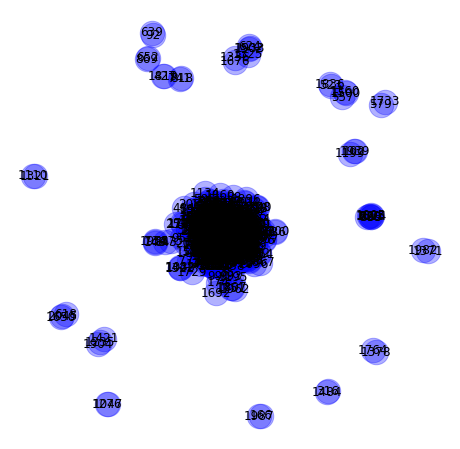

In [55]:
G_friends = nx.Graph()
G_friends.add_edges_from(db_user_friends.values)

showGraphFeatures(G_friends)
showGraph(G_friends)

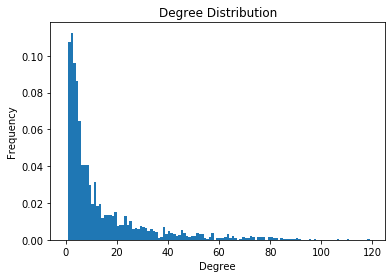

In [56]:
showDegreeDistribution(G_friends)

In [57]:
# identify largest connected component
Gcc = sorted(nx.connected_components(G_friends), key=len, reverse=True)
G_largestConnectedComponent = G_friends.subgraph(Gcc[0])

print("diameter: %d" % nx.diameter(G_largestConnectedComponent))
print("density: %s" % nx.density(G_friends))

diameter: 9
density: 0.007108893467778271


#### 2. Compute the centrality measures, select the one that you consider more representative and justify your choice.

In [58]:
showDegreeCentrality(G_friends)

Central node according to degree centrality is:  1543


In [59]:
showEigenvectorCentrality(G_friends)

Central node according to eigenvector centrality is:  1300


In [60]:
showBetweennessCentrality(G_friends)

Central node according to betweenness centrality is:  1543


In [61]:
showClosenessCentrality(G_friends)

Central node according to closeness centrality is:  831


#### 3.1 Extract the communities based on social network

Number of nodes in the graph:  1892
Number of edges in the graph:  12717


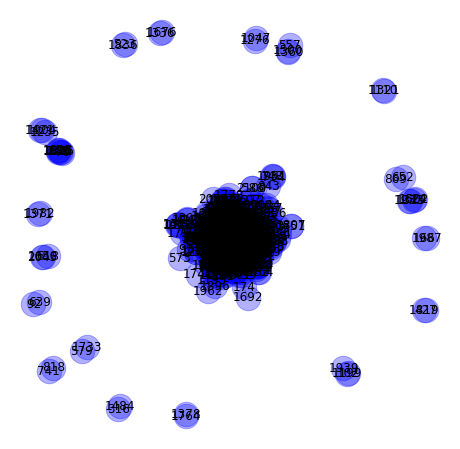

In [62]:
showGraphFeatures(G_friends)
showGraph(G_friends)

Number of communities:  32
Louvain modularity:  0.4539874976509855


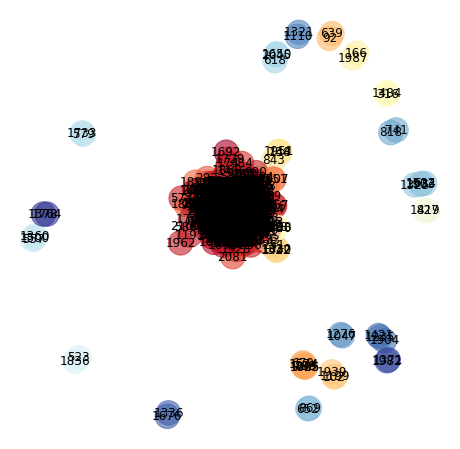

In [63]:
friends_partition = computeAndShowCommunities(G_friends)
showGraphCommunities(G_friends, friends_partition)

#### 3.2 Extract the communities based on similarity (e.g., preferred artist(s), music type)

##### Extract the communities based on similarity: preferred artist(s)

Number of nodes in the graph:  2345
Number of edges in the graph:  1927


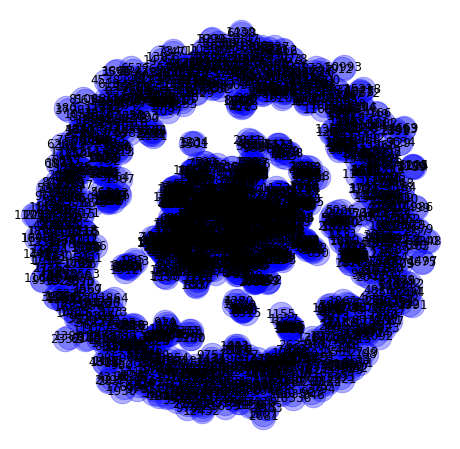

In [64]:
mask = db_user_artists.groupby(['userID'])['weight'].transform(max) == db_user_artists['weight']
db_user_preferredArtist = db_user_artists[mask]
del db_user_preferredArtist["weight"]

G_preferredArtist = nx.Graph()
G_preferredArtist.add_edges_from(db_user_preferredArtist.values)

showGraphFeatures(G_preferredArtist)
showGraph(G_preferredArtist)

Number of communities:  445
Louvain modularity:  0.9676252764029255


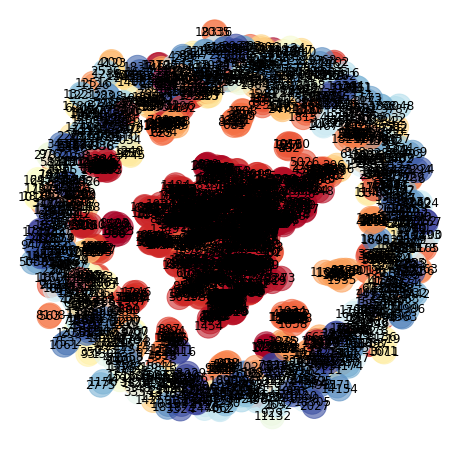

In [65]:
preferredArtist_partition = computeAndShowCommunities(G_preferredArtist)
showGraphCommunities(G_preferredArtist, preferredArtist_partition)

##### Extract the communities based on similarity: preferred music type(s)

Number of nodes in the graph:  1861
Number of edges in the graph:  1864


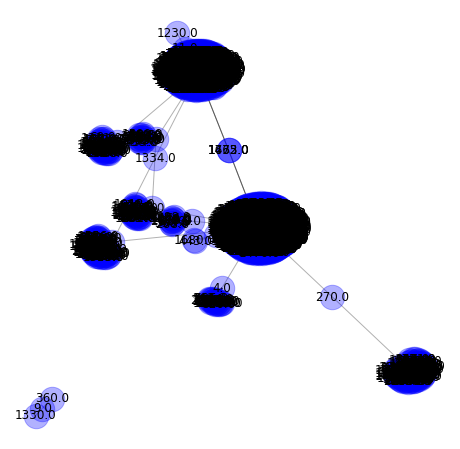

In [66]:
G_preferredMusicType = nx.Graph()
G_preferredMusicType.add_edges_from(db_user_preferredMusicType.values)

showGraphFeatures(G_preferredMusicType)
showGraph(G_preferredMusicType)

Number of communities:  10
Louvain modularity:  0.6297665906076736


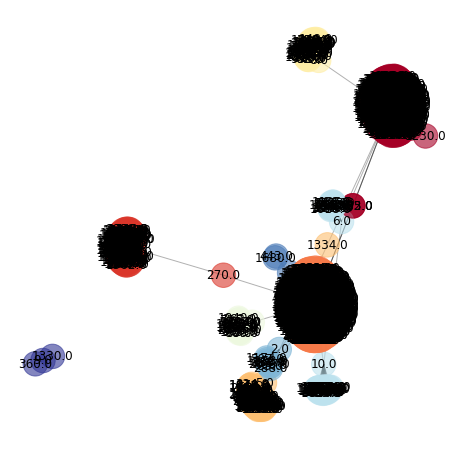

In [67]:
preferredMusicType_partition = computeAndShowCommunities(G_preferredMusicType)
showGraphCommunities(G_preferredMusicType, preferredMusicType_partition)

#### 4. Compute the global clustering coefficient of the:
- global network 
- the communities 
- (OPTIONAL) compare them and discuss the result

In [69]:
showGlobalClustering(G_friends)
showGlobalClustering(G_preferredArtist)
showGlobalClustering(G_preferredMusicType)

Global clustering coefficient:  0.13375631759143525
Global clustering coefficient:  0.0003864236491273266
Global clustering coefficient:  0


In [70]:
showGlobalClusteringOfCommunities(G_friends, friends_partition)
showGlobalClusteringOfCommunities(G_preferredArtist, preferredArtist_partition)
showGlobalClusteringOfCommunities(G_preferredMusicType, preferredMusicType_partition)

Global clustering coefficient for community 0 : 0.26105563480741795
Global clustering coefficient for community 1 : 0.2068393828197533
Global clustering coefficient for community 2 : 0.12948769665187576
Global clustering coefficient for community 3 : 0.10005495202265714
Global clustering coefficient for community 4 : 0.20348030319205723
Global clustering coefficient for community 5 : 0.1769436997319035
Global clustering coefficient for community 6 : 0.33916083916083917
Global clustering coefficient for community 7 : 0.4576271186440678
Global clustering coefficient for community 8 : 0.3409090909090909
Global clustering coefficient for community 9 : 1.0
Global clustering coefficient for community 10 : 0
Global clustering coefficient for community 11 : 1.0
Global clustering coefficient for community 12 : 0.7142857142857143
Global clustering coefficient for community 13 : 0
Global clustering coefficient for community 14 : 0
Global clustering coefficient for community 15 : 0
Global clusteri

Global clustering coefficient for community 0 : 0
Global clustering coefficient for community 1 : 0
Global clustering coefficient for community 2 : 0
Global clustering coefficient for community 3 : 0
Global clustering coefficient for community 4 : 0
Global clustering coefficient for community 5 : 0
Global clustering coefficient for community 6 : 0
Global clustering coefficient for community 7 : 0
Global clustering coefficient for community 8 : 0
Global clustering coefficient for community 9 : 0


#### 5. Compute the local clustering coefficients, and extract the average, within: 
- the global network 
- the communities 
- (OPTIONAL) compare them and discuss the result

In [71]:
showLocalClustering(G_friends)
showLocalClustering(G_preferredArtist)
showLocalClustering(G_preferredMusicType)

Average local clustering coefficient of the global network: 0.18654479547922218
Average local clustering coefficient of the global network: 0.000489512270200665
Average local clustering coefficient of the global network: 0.0


In [72]:
showLocalClusteringOfCommunities(G_friends, friends_partition)
showLocalClusteringOfCommunities(G_preferredArtist, preferredArtist_partition)
showLocalClusteringOfCommunities(G_preferredMusicType, preferredMusicType_partition)

Average local clustering coefficient for community 0 : 0.30080810834681754
Average local clustering coefficient for community 1 : 0.248949224784116
Average local clustering coefficient for community 2 : 0.2208119792433732
Average local clustering coefficient for community 3 : 0.14484182347453375
Average local clustering coefficient for community 4 : 0.22168217744659613
Average local clustering coefficient for community 5 : 0.4107770631630653
Average local clustering coefficient for community 6 : 0.27263183370778304
Average local clustering coefficient for community 7 : 0.4538461538461538
Average local clustering coefficient for community 8 : 0.225
Average local clustering coefficient for community 9 : 1.0
Average local clustering coefficient for community 10 : 0.0
Average local clustering coefficient for community 11 : 1.0
Average local clustering coefficient for community 12 : 0.9
Average local clustering coefficient for community 13 : 0.0
Average local clustering coefficient for comm

Average local clustering coefficient for community 0 : 0.0
Average local clustering coefficient for community 1 : 0.0
Average local clustering coefficient for community 2 : 0.0
Average local clustering coefficient for community 3 : 0.0
Average local clustering coefficient for community 4 : 0.0
Average local clustering coefficient for community 5 : 0.0
Average local clustering coefficient for community 6 : 0.0
Average local clustering coefficient for community 7 : 0.0
Average local clustering coefficient for community 8 : 0.0
Average local clustering coefficient for community 9 : 0.0


#### Extracting of a DataFrame which identify each user in own community

In [73]:
users_communities = pd.DataFrame()
users_communities['userID'] = friends_partition.keys()
users_communities['community'] = friends_partition.values();
users_communities.to_csv(r'datasets/users_communities.csv', index = True, header = True)

#### 6. Compute the similarity between users according to: 
- Their common friends 
- The artist(s) listened 
- Music type 
- (OPTIONAL) The artist(s) preferred by their friends 
- (OPTIONAL) The type of music listened by their friends

In [75]:
computeJaccardSimilarity(G_friends)
computeJaccardSimilarity(G_preferredArtist)
computeJaccardSimilarity(G_preferredMusicType)

[(0.0, 1.0, 0.0009182736455463728),
 (0.0, 2.0, 0.0),
 (0.0, 3.0, 0.0),
 (0.0, 4.0, 0.0),
 (0.0, 5.0, 0.0),
 (0.0, 6.0, 0.0),
 (0.0, 7.0, 0.0),
 (0.0, 8.0, 0.0),
 (0.0, 9.0, 0.0),
 (0.0, 10.0, 0.0),
 (0.0, 11.0, 0.0),
 (0.0, 12.0, 0.0),
 (0.0, 13.0, 0.0),
 (0.0, 14.0, 0.0),
 (0.0, 15.0, 0.0),
 (0.0, 16.0, 0.0),
 (0.0, 17.0, 0.0),
 (0.0, 20.0, 0.0),
 (0.0, 21.0, 0.0),
 (0.0, 23.0, 0.0),
 (0.0, 24.0, 0.0),
 (0.0, 25.0, 0.0),
 (0.0, 26.0, 0.0),
 (0.0, 27.0, 0.0),
 (0.0, 28.0, 0.0),
 (0.0, 29.0, 0.0),
 (0.0, 30.0, 0.0),
 (0.0, 31.0, 0.0),
 (0.0, 32.0, 0.0),
 (0.0, 33.0, 0.0),
 (0.0, 34.0, 0.0),
 (0.0, 35.0, 0.0),
 (0.0, 36.0, 0.0),
 (0.0, 37.0, 0.0),
 (0.0, 38.0, 0.0),
 (0.0, 39.0, 0.0),
 (0.0, 40.0, 0.0),
 (0.0, 41.0, 0.0),
 (0.0, 42.0, 0.0),
 (0.0, 43.0, 0.0),
 (0.0, 44.0, 0.0),
 (0.0, 45.0, 0.0),
 (0.0, 46.0, 0.0),
 (0.0, 47.0, 0.0),
 (0.0, 48.0, 0.0),
 (0.0, 49.0, 0.0),
 (0.0, 50.0, 0.0),
 (0.0, 51.0, 0.0),
 (0.0, 52.0, 0.0),
 (0.0, 53.0, 0.0),
 (0.0, 54.0, 0.0),
 (0.0, 55.0, 0.0),
 (0

## Task4: Binary classifier for inferring users's artists interest.
Build a binary classifier which is able to infer, given a tuple <user-artist>, if the user would be interested in the artist or not. In order to build the classifier consider a set of features (at least 10 features are expected) which characterize a tuple user-artist. Some examples of features are listed below, given a tuple of user U and artist A. 
- Feature 1: popularity of artist A. 
- Feature 2: popularity of the N clusters C(i), which artist A belongs to. 
- Feature 3: number of artists listened to by user U, belonging to the same clusters C(i) of artist A.
- Feature 4: number of friends of user U, which listened to artist A. 
- Feature 5: boolean representing if artist A similarity to the user's most listened artists is lower than a certain distance threshold d .
- Feature 6: the communities computed in Task 3.

Analysing datasets in way to see if are well formed and checking for null values

In [ ]:
print("Missing values: " + str(users_communities.isnull().sum()))
